In [89]:
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#import necessary csv files that Stuart has done 
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jimp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [90]:
df = pd.read_csv('data/master_df.csv', index_col='created_at')
df.index = pd.to_datetime(df.index, unit='s')
df.head(50)

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,creator,currency,currency_symbol,currency_trailing_code,...,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type
created_at,,,,,,,,,,,,,,,,,,,,,
2020-12-31 01:00:06,18,A cookbook for lyke minded poeple who love sim...,"{""id"":306,""name"":""Cookbooks"",""analytics_name"":...",5034,US,the United States,"{""id"":1076439302,""name"":""Ali"",""slug"":""lykemind...",USD,$,True,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1611968831,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,5034.000000,international
2020-11-25 04:29:20,508,A cookbook filled with memoirs and recipes fro...,"{""id"":306,""name"":""Cookbooks"",""analytics_name"":...",48365,HK,Hong Kong,"{""id"":974771323,""name"":""Peggy Chan"",""slug"":""ch...",HKD,$,True,...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1614096106,0.128984,"{""web"":{""project"":""https://www.kickstarter.com...",0.128976,48368.291331,international
2020-11-27 11:38:16,14,Zine de libro de recetas para estudiantes,"{""id"":306,""name"":""Cookbooks"",""analytics_name"":...",98,ES,Spain,"{""id"":1376613464,""name"":""Asociación Trece Aran...",EUR,€,False,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1607900340,1.196375,"{""web"":{""project"":""https://www.kickstarter.com...",1.211149,96.906412,international
2020-11-04 14:41:45,1486,"A Chef's Guide to Hunting, Preparing and Cooki...","{""id"":306,""name"":""Cookbooks"",""analytics_name"":...",127765,US,the United States,"{""id"":365711508,""name"":""Jesse Griffiths"",""slug...",USD,$,True,...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1610082068,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,127765.690000,international
2020-11-15 15:38:47,249,A selection of the recipes we love from the co...,"{""id"":306,""name"":""Cookbooks"",""analytics_name"":...",14574,GB,the United Kingdom,"{""id"":349330105,""name"":""Eilis and Emma"",""slug""...",GBP,£,False,...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1608573895,1.327616,"{""web"":{""project"":""https://www.kickstarter.com...",1.336255,14480.304767,international
2020-10-21 01:11:18,652,A Book Where Interesting Food Things Happen: 1...,"{""id"":306,""name"":""Cookbooks"",""analytics_name"":...",46726,CA,Canada,"{""id"":2030726459,""name"":""Len Senater"",""slug"":""...",CAD,$,True,...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1608584400,0.765044,"{""web"":{""project"":""https://www.kickstarter.com...",0.778771,45902.874463,international
2020-10-19 00:19:28,729,Learn the homestead kitchen skills you need to...,"{""id"":306,""name"":""Cookbooks"",""analytics_name"":...",27616,AU,Australia,"{""id"":706848724,""name"":""Kate Downham"",""is_regi...",AUD,$,True,...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1607914800,0.730818,"{""web"":{""project"":""https://www.kickstarter.com...",0.753400,26789.112766,international
2020-10-04 21:10:11,189,Stories and recipes from a pop-up noodle shop,"{""id"":306,""name"":""Cookbooks"",""analytics_name"":...",13622,US,the United States,"{""id"":1121750,""name"":""Britta Schroeter Phillip...",USD,$,True,...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1605816000,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,13622.000000,international
2020-09-18 14:39:39,202,"Featuring great recipes, photos and stories fr...","{""id"":306,""name"":""Cookbooks"",""analytics_name"":...",12318,US,the United States,"{""id"":2057617106,""name"":""WagsStuff"",""slug"":""wa...",USD,$,True,...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1605193201,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,1231

In [91]:
# Fetch the Kickstarter description data 
kickstart_sentiment = df.drop(columns = ['converted_pledged_amount', 'currency', 'currency_symbol', 'currency_trailing_code', 'current_currency', 'deadline', 'fx_rate', 'id', 'is_starrable','source_url', 'static_usd_rate', 'usd_exchange_rate', 'usd_type'])
                                         #(q='blurb',
                        #language='en', 
                        #sort_by ='relevancy')   
kickstart_sentiment            

,backers_count,blurb,category,country,country_displayable_name,creator,disable_communication,goal,launched_at,location,...,photo,pledged,profile,slug,spotlight,staff_pick,state,state_changed_at,urls,usd_pledged
created_at,,,,,,,,,,,,,,,,,,,,,
2020-12-31 01:00:06,18,A cookbook for lyke minded poeple who love sim...,"{""id"":306,""name"":""Cookbooks"",""analytics_name"":...",US,the United States,"{""id"":1076439302,""name"":""Ali"",""slug"":""lykemind...",False,5000.0,1609545583,"{""id"":23417205,""name"":""Newport Beach"",""slug"":""...",...,"{""key"":""assets/031/920/501/1a53ee27a4a0fb1b390...",5034.00,"{""id"":4134642,""project_id"":4134642,""state"":""in...",lyke-minded-cookbook,True,False,successful,1611968831,"{""web"":{""project"":""https://www.kickstarter.com...",5034.000000
2020-11-25 04:29:20,508,A cookbook filled with memoirs and recipes fro...,"{""id"":306,""name"":""Cookbooks"",""analytics_name"":...",HK,Hong Kong,"{""id"":974771323,""name"":""Peggy Chan"",""slug"":""ch...",False,350000.0,1608912106,"{""id"":2165352,""name"":""Hong Kong"",""slug"":""hong-...",...,"{""key"":""assets/032/094/820/7a1583504407fcfad59...",374995.00,"{""id"":4114692,""project_id"":4114692,""state"":""ac...",provenance-principles-of-plant-based-cookery,True,True,successful,1614096106,"{""web"":{""project"":""https://www.kickstarter.com...",48368.291331
2020-11-27 11:38:16,14,Zine de libro de recetas para estudiantes,"{""id"":306,""name"":""Cookbooks"",""analytics_name"":...",ES,Spain,"{""id"":1376613464,""name"":""Asociación Trece Aran...",False,50.0,1606751262,"{""id"":20220580,""name"":""Aranjuez"",""slug"":""aranj...",...,"{""key"":""assets/031/575/623/b861e6ec7bfd8a28a7c...",81.00,"{""id"":4115923,""project_id"":4115923,""state"":""in...",trecetario-recetario-para-estudiantes,True,False,successful,1607900340,"{""web"":{""project"":""https://www.kickstarter.com...",96.906412
2020-11-04 14:41:45,1486,"A Chef's Guide to Hunting, Preparing and Cooki...","{""id"":306,""name"":""Cookbooks"",""analytics_name"":...",US,the United States,"{""id"":365711508,""name"":""Jesse Griffiths"",""slug...",False,65000.0,1606194068,"{""id"":2357536,""name"":""Austin"",""slug"":""austin-t...",...,"{""key"":""assets/031/597/486/53a02a84990be110e41...",127765.69,"{""id"":4102184,""project_id"":4102184,""state"":""ac...",the-hog-book-by-jesse-griffiths,True,True,successful,1610082068,"{""web"":{""project"":""https://www.kickstarter.com...",127765.690000
2020-11-15 15:38:47,249,A selection of the recipes we love from the co...,"{""id"":306,""name"":""Cookbooks"",""analytics_name"":...",GB,the United Kingdom,"{""id"":349330105,""name"":""Eilis and Emma"",""slug""...",False,10600.0,1605981895,"{""id"":17044,""name"":""Coventry"",""slug"":""coventry...",...,"{""key"":""assets/031/422/744/6906d009135426ddd4e...",10907.00,"{""id"":4108693,""project_id"":4108693,""state"":""in...",gloria-and-lils-the-recipe-book,True,True,successful,1608573895,"{""web"":{""project"":""https://www.kickstarter.com...",14480.304767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-21 16:51:44,32,Rori’s duty is to protect mythical creatures. ...,"{""id"":47,""name"":""Fiction"",""analytics_name"":""Fi...",US,the United States,"{""id"":1849138088,""name"":""Rayna L. Stiner"",""is_...",False,3000.0,1441375460,"{""id"":2490383,""name"":""Seattle"",""slug"":""seattle...",...,"{""key"":""assets/012/174/956/340cd998b8db7861695...",3395.00,"{""id"":1972769,""project_id"":1972769,""state"":""in...",the-broken-veil-publishing-project,True,False,successful,1443967460,"{""web"":{""project"":""https://www.kickstarter.com...",3395.000000
2015-08-27 02:48:20,284,THE PRIDE is the story of an ancient race of D...,"{""id"":47,""name"":""Fiction"",""analytics_name"":""Fi...",US,the United States,"{""id"":980145996,""name"":""John Campea"",""is_regis...",False,12000.0,1441345679,"{""id"":2371863,""name"":""Burbank"",""slug"":""burbank...",...,"{""key"":""assets

In [92]:
sentiments = []

for blurb in kickstart_sentiment["blurb"]:
    try:
        results = analyzer.polarity_scores(blurb)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": blurb,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
kicks  = pd.DataFrame(sentiments)
kicks.head(20)

,text,Compound,Positive,Negative,Neutral
0,A cookbook for lyke minded poeple who love sim...,0.8720,0.405,0.000,0.595
1,A cookbook filled with memoirs and recipes fro...,0.0000,0.000,0.000,1.000
2,Zine de libro de recetas para estudiantes,0.0000,0.000,0.000,1.000
3,"A Chef's Guide to Hunting, Preparing and Cooki...",0.0000,0.000,0.000,1.000
4,A selection of the recipes we love from the co...,0.6369,0.231,0.000,0.769
5,A Book Where Interesting Food Things Happen: 1...,0.4019,0.213,0.000,0.787
6,Learn the homestead kitchen skills you need to...,0.0000,0.000,0.000,1.000
7,Stories and recipes from a pop-up noodle shop,0.0000,0.000,0.000,1.000
8,"Featuring great recipes, photos and stories fr...",0.6249,0.313,0.000,0.687
9,A recipe collection of Julie Foulon,0.0000,0.000,0.000,1.000


In [95]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [96]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop = stopwords.words('english') 
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [97]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)

#sent = article.split('.')[0]
#print(sent.split(' '))
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
   
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    # Remove the stop words
       
    return tokens
   

In [98]:
# Expand the default stopwords list if necessary have added some words that are related to numerical characters since they dont make sense in word cloud
sw_addons = ['said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'parent_id', 'age', 'parent_name', 'also', 'may', 'id',  'based', 'time', 'want', 'will', 'city', 'us', 'bring', 'come', 'back', 'way', 'find', 'two', 'bring', 'will', 'new', 'one', 'made'] 
stop.append(sw_addons) 


In [99]:
# Create a new tokens column for Kickstart breaks down into individual words
kicks["tokens"] = kicks.text.apply(tokenizer) 
kicks.head() 


,text,Compound,Positive,Negative,Neutral,tokens
0,A cookbook for lyke minded poeple who love sim...,0.8720,0.405,0.0,0.595,"[cookbook, lyke, minded, poeple, love, simple,..."
1,A cookbook filled with memoirs and recipes fro...,0.0000,0.000,0.0,1.000,"[cookbook, filled, memoir, recipe, grassroots,..."
2,Zine de libro de recetas para estudiantes,0.0000,0.000,0.0,1.000,"[zine, de, libro, de, recetas, para, estudiantes]"
3,"A Chef's Guide to Hunting, Preparing and Cooki...",0.0000,0.000,0.0,1.000,"[chefs, guide, hunting, preparing, cooking, wi..."
4,A selection of the recipes we love from the co...,0.6369,0.231,0.0,0.769,"[selection, recipe, love, counter, kitchen, cafe]"


In [100]:
from collections import Counter
from nltk import ngrams
!pip install wordcloud
#from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [101]:
basewidth = 2000
#wpercent = (basewidth/float(Image.size[0]))
#hsize = int((float(Image.size[1])*float(wpercent)))
#Image = Image.resize((basewidth,hsize), Image.LANCZOS)
#mask = Image.open("kickstarter-logo-k-white.png")


#mask = np.array(Image.open("kickstarter-logo-k-white.png"))
#mask = [0]
#mask = mask.resize((2000,1000))
mask = Image.open("bucket.jpg")
mask = mask.resize((2000,1000))
mask = np.array(mask)
mask = mask[0]
mask

array([[229, 238, 237],
       [229, 238, 237],
       [229, 238, 237],
       ...,
       [229, 238, 237],
       [229, 238, 237],
       [229, 238, 237]], dtype=uint8)

In [102]:
def transform_zeros(val):
    if val == 0:
        return 255
    else:
        return val

In [103]:
maskable_image = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)


In [104]:
for i in range(len(mask)):
    maskable_image[i] = list(map(transform_zeros, mask[i]))

In [105]:
# Generate the Kickstarter word cloud
def wordcloud(text, title=""):
    wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', colormap='Set2', collocations=False).generate(text) 
    plt.imshow(wordcloud)
    plt.axis("off")
    fontdict = {"fontsize": 40, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()
    wordcloud.to_file(f'wordcloud1.jpg'
            )
    stopwords = sw_addons,

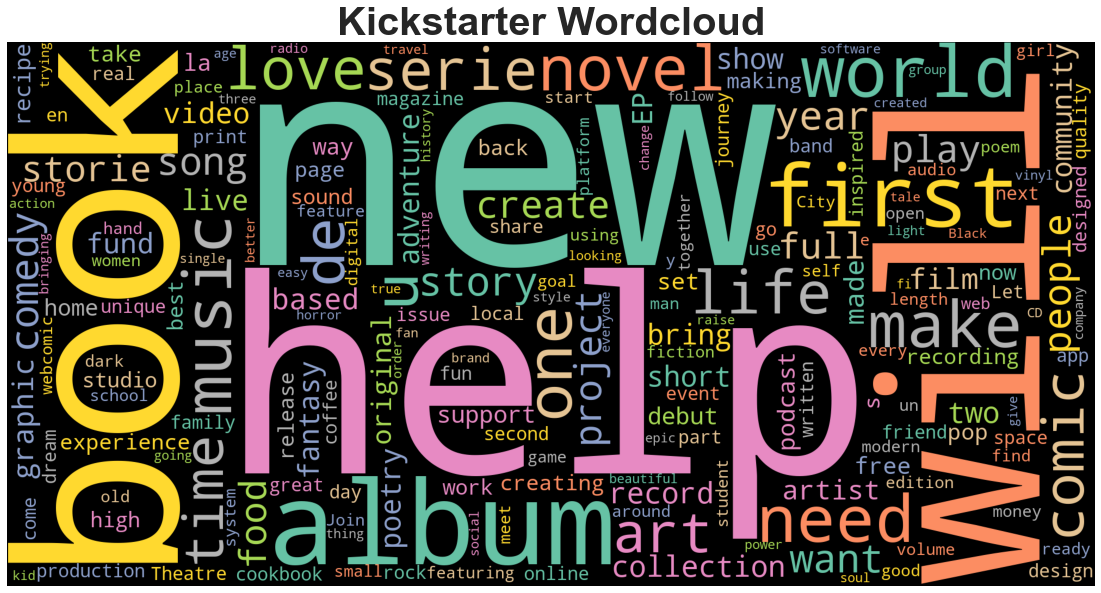

In [106]:
wordcloud(kicks.text.str.cat(),  title = "Kickstarter Wordcloud") 

In [107]:
location_df = pd.read_csv('data/location.csv', index_col='id')
location_df.index = pd.to_datetime(location_df.index, unit='s')
location_df.head(1)

,name,slug,short_name,displayable_name,localized_name,country,state,type,is_root,expanded_country,urls.web.discover,urls.web.location,urls.api.nearby_projects
id,,,,,,,,,,,,,
1970-01-28 10:51:03,Burbank,burbank-ca,"Burbank, CA","Burbank, CA",Burbank,US,CA,Town,False,United States,https://www.kickstarter.com/discover/places/bu...,https://www.kickstarter.com/locations/burbank-ca,https://api.kickstarter.com/v1/discover?signat...


In [108]:
location_df['displayable_name'].head(20)


id
1970-01-28 10:51:03                 Burbank, CA
1970-01-28 12:59:12                Cheyenne, WY
1970-01-29 11:27:12                  Normal, IL
1970-08-22 05:22:29               Italia, Italy
1970-01-01 01:08:38             Toronto, Canada
1970-01-01 02:26:15             Calgary, Canada
1970-01-29 11:52:08              Northfield, MN
1970-01-01 09:35:03               Sheffield, UK
1970-01-08 01:29:03    Marnay-sur-Seine, France
1970-01-29 23:25:23                  Tacoma, WA
1971-10-09 11:26:52    Downtown Toronto, Canada
1970-01-01 09:34:58            Sheepy Parva, UK
1970-01-13 19:00:23              Queanbeyan, AU
1970-01-29 08:41:06                 Midland, MI
1970-01-29 10:32:50               Nashville, TN
1970-01-29 23:25:23                  Tacoma, WA
1970-01-29 21:19:28              South Bend, IN
1970-01-01 10:56:28              Wednesbury, UK
1970-01-29 06:20:47             Los Angeles, CA
1970-01-29 18:57:37                  Salina, KS
Name: displayable_name, dtype: object

In [109]:
types = []

for region in location_df['displayable_name']:
    t = str(region).replace(r" ","")
    types.append(t)
    
    
location  = pd.DataFrame({'text':types})
location.head(50)            
#datacategory_df = df["category"]
#datacategory_df.head

,text
0,"Burbank,CA"
1,"Cheyenne,WY"
2,"Normal,IL"
3,"Italia,Italy"
4,"Toronto,Canada"
5,"Calgary,Canada"
6,"Northfield,MN"
7,"Sheffield,UK"
8,"Marnay-sur-Seine,France"
9,"Tacoma,WA"


In [110]:
def wordcloud(text, title=""):
    wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black', colormap='Set2', collocations=False).generate(text) 
    plt.imshow(wordcloud)
    plt.axis("off")
    fontdict = {"fontsize": 40, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()
    wordcloud.to_file(f'wordcloud2.jpg'
            )
    stopwords = sw_addons,

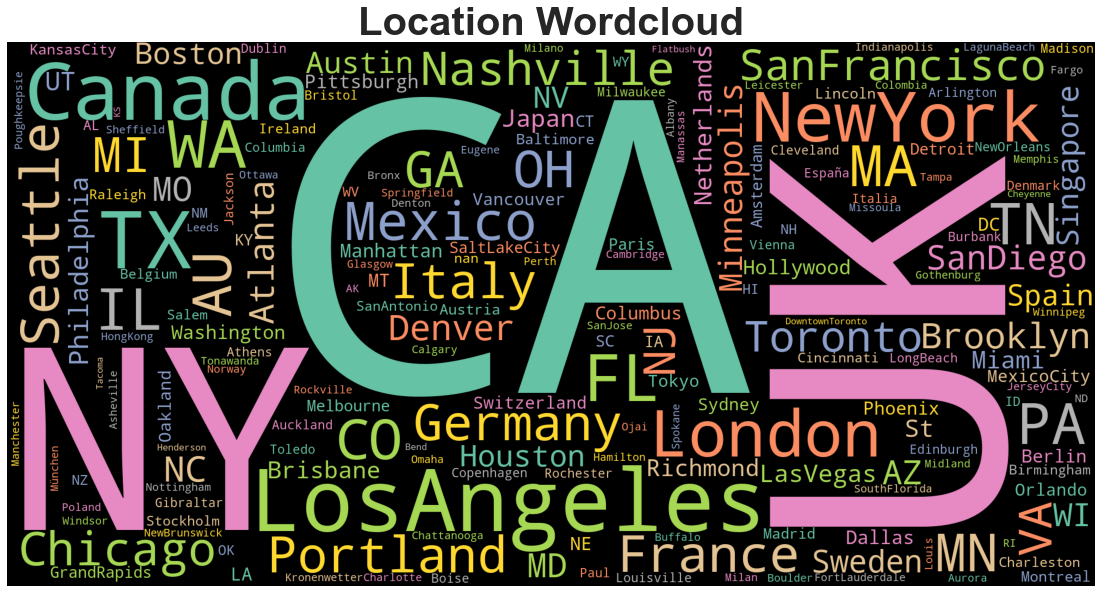

In [111]:
wordcloud(location.text.str.cat(sep = ' '),  title = "Location Wordcloud") 